In [28]:
import pandas as pd

In [29]:
data = pd.read_csv('../data/processed/5g_smartphones_dataset.csv')
data.head(10)

,Model,Brand,Screen Size (in),Front Camera (MP),Back Camera (MP),Battery (mAh),RAM (GB),ROM (GB),Clock Speed (Ghz),Price (Rs.)
0,Realme 14 Pro Plus 5G,Realme,6.83,32.0,50.0,6000,8,128,2.50,29999
1,OnePlus 13R 5G,OnePlus,6.78,16.0,50.0,6000,12,256,3.30,42972
2,Realme 14 Pro 5G,Realme,6.77,16.0,50.0,6000,8,128,2.50,24999
3,Poco X7 Pro,Poco,6.67,20.0,50.0,6550,8,256,3.25,27999
4,Motorola Edge 50 Fusion,Motorola,6.67,32.0,50.0,5000,8,128,2.40,20999
5,OPPO Reno 13 Pro 5G,OPPO,6.83,50.0,50.0,5800,12,256,3.35,49999
6,Xiaomi Redmi Note 14,Xiaomi,6.67,20.0,50.0,5110,6,128,2.50,17440
7,Samsung Galaxy M35 5G,Samsung,6.60,13.0,50.0,6000,6,128,2.40,15027
8,Motorola Moto G85 5G,Motorola,6.67,32.0,50.0,5000,8,128,2.30,16999
9,OnePlus Nord 4 5G,OnePlus,6.74,16.0,50.0,5500,8,128,2.80,26999


In [30]:
len(data['Brand'].unique())

20

In [31]:
data['Brand'].unique()

array(['Realme', 'OnePlus', 'Poco', 'Motorola', 'OPPO', 'Xiaomi',
       'Samsung', 'iQOO', 'Vivo', 'Apple', 'Nothing', 'Honor', 'CMF',
       'Infinix', 'Google', 'Tecno', 'Nokia', 'Lava', 'Asus', 'Huawei'],
      dtype=object)

In [32]:
data['Brand'] = data['Brand'].map({'OPPO':0, 'Motorola':1, 'Xiaomi':2, 'OnePlus':3, 'iQOO':4, 'Vivo':5, 'Realme':6, 'Samsung':7, 'Poco':8, 'Apple':9, 'Honor':10, 'Nothing':11, 'CMF':12, 'Infinix':13, 'Google':14, 'Tecno':15, 'Lava':16, 'Asus':17, 'Nokia':18, 'Huawei':19})
data.head(10)

,Model,Brand,Screen Size (in),Front Camera (MP),Back Camera (MP),Battery (mAh),RAM (GB),ROM (GB),Clock Speed (Ghz),Price (Rs.)
0,Realme 14 Pro Plus 5G,6,6.83,32.0,50.0,6000,8,128,2.50,29999
1,OnePlus 13R 5G,3,6.78,16.0,50.0,6000,12,256,3.30,42972
2,Realme 14 Pro 5G,6,6.77,16.0,50.0,6000,8,128,2.50,24999
3,Poco X7 Pro,8,6.67,20.0,50.0,6550,8,256,3.25,27999
4,Motorola Edge 50 Fusion,1,6.67,32.0,50.0,5000,8,128,2.40,20999
5,OPPO Reno 13 Pro 5G,0,6.83,50.0,50.0,5800,12,256,3.35,49999
6,Xiaomi Redmi Note 14,2,6.67,20.0,50.0,5110,6,128,2.50,17440
7,Samsung Galaxy M35 5G,7,6.60,13.0,50.0,6000,6,128,2.40,15027
8,Motorola Moto G85 5G,1,6.67,32.0,50.0,5000,8,128,2.30,16999
9,OnePlus Nord 4 5G,3,6.74,16.0,50.0,5500,8,128,2.80,26999


In [33]:
data['Brand'].unique()

array([ 6,  3,  8,  1,  0,  2,  7,  4,  5,  9, 11, 10, 12, 13, 14, 15, 18,
       16, 17, 19], dtype=int64)

In [34]:
print(f"Dataset Shape: {data.shape}")
print("\nBasic Statistics:")
print(data.drop(['Brand', 'Model'],axis=1).describe())

Dataset Shape: (958, 10)

Basic Statistics:
       Screen Size (in)  Front Camera (MP)  ...  Clock Speed (Ghz)    Price (Rs.)
count        958.000000         958.000000  ...         958.000000     958.000000
mean           6.620605          20.355428  ...           2.664551   32268.014614
std            0.174938          12.249908  ...           0.450573   26836.710855
min            5.400000           5.000000  ...           2.000000    7999.000000
25%            6.550000          12.000000  ...           2.400000   16991.000000
50%            6.670000          16.000000  ...           2.500000   23998.000000
75%            6.720000          32.000000  ...           3.000000   34999.000000
max            7.200000          60.000000  ...           4.320000  179900.000000

[8 rows x 8 columns]


In [35]:
# Correlation
final_data = data.drop(['Model'],axis=1)
correlation_matrix = final_data.corr()
print("\nCorrelations with Price:")
print(correlation_matrix['Price (Rs.)'].sort_values(ascending=False))


Correlations with Price:
Price (Rs.)          1.000000
Clock Speed (Ghz)    0.717356
ROM (GB)             0.673602
RAM (GB)             0.335917
Brand                0.133051
Front Camera (MP)    0.091897
Back Camera (MP)     0.014457
Screen Size (in)    -0.141947
Battery (mAh)       -0.347274
Name: Price (Rs.), dtype: float64


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

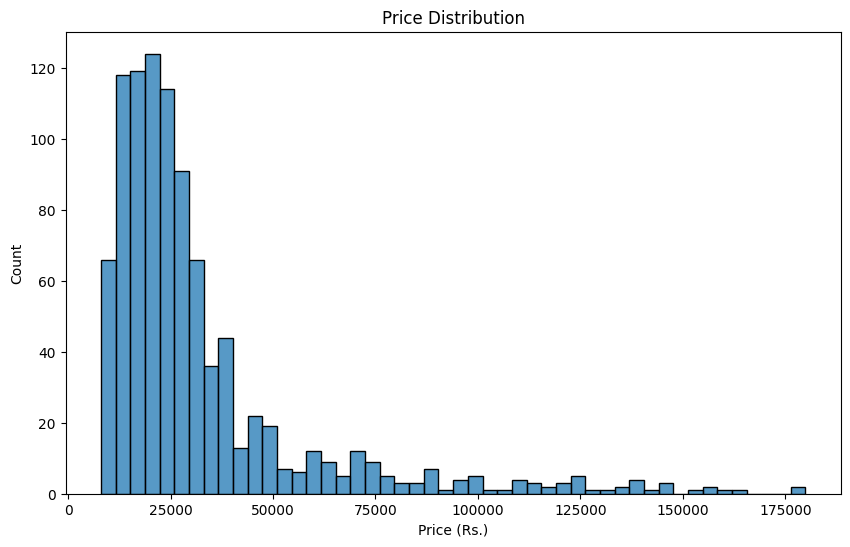

In [37]:
# Price distribution
plt.figure(figsize=(10, 6))
sns.histplot(final_data['Price (Rs.)'])
plt.title('Price Distribution')
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
X = final_data.drop(['Price (Rs.)'], axis=1)
X

,Brand,Screen Size (in),Front Camera (MP),Back Camera (MP),Battery (mAh),RAM (GB),ROM (GB),Clock Speed (Ghz)
0,6,6.83,32.0,50.0,6000,8,128,2.50
1,3,6.78,16.0,50.0,6000,12,256,3.30
2,6,6.77,16.0,50.0,6000,8,128,2.50
3,8,6.67,20.0,50.0,6550,8,256,3.25
4,1,6.67,32.0,50.0,5000,8,128,2.40
...,...,...,...,...,...,...,...,...
953,1,6.50,13.0,48.0,5000,4,128,2.20
954,6,6.60,16.0,48.0,5000,6,128,2.40
955,6,6.43,32.0,64.0,4300,8,256,2.40
956,3,6.62,16.0,50.0,4500,8,128,2.84


In [39]:
y = final_data['Price (Rs.)']
y

0      29999
1      42972
2      24999
3      27999
4      20999
       ...  
953    16990
954    14990
955    25999
956    34999
957    89990
Name: Price (Rs.), Length: 958, dtype: int64

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.preprocessing import RobustScaler

In [42]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=12,
    random_state=42
)

In [45]:
model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=12, n_estimators=300, random_state=42)

In [46]:
model.score(X_test_scaled,y_test)

0.8443875842013207

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predictions
y_pred = model.predict(X_test_scaled)

# MAE and RMSE for each target
mae_price = mean_absolute_error(y_test, y_pred)
rmse_price = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mae_price)
print("RMSE:", rmse_price)

MAE: 5624.302182064274
RMSE: 9444.233955140668


In [48]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", scores.mean())

Cross-Validation Scores: [0.91016887 0.84078202 0.73221057 0.90441884 0.86383693]
Mean CV Score: 0.8502834481537402


Text(0.5, 1.0, 'Actual vs Predicted Price')

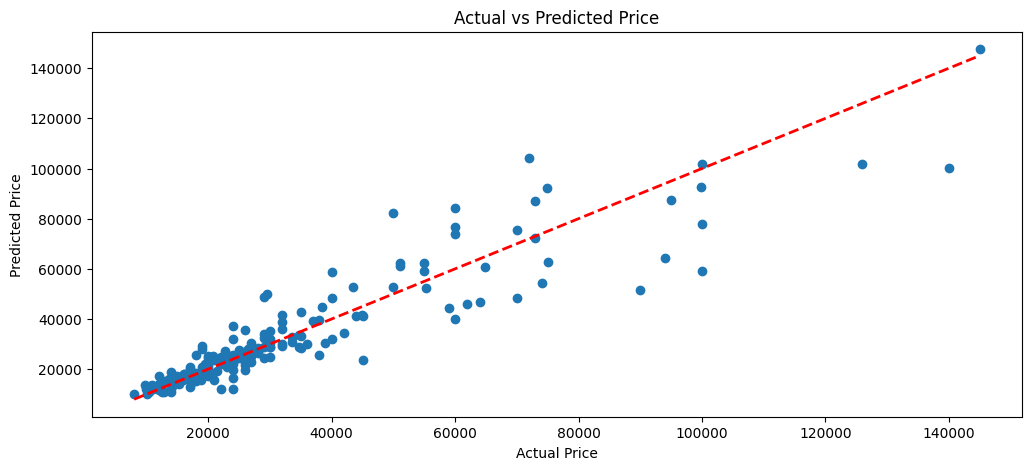

In [49]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(12, 5))

# Price predictions
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')

In [50]:
import pickle

In [51]:
pickle.dump(model, open('../models/model.pkl', 'wb'))